###Practica 3: Reducción de dimensionalidad

In [134]:
import numpy as np
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import matplotlib
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.patches as mpatches

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist


In [61]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [97]:
X_train_pca = X_train.reshape(60000,784)
X_train_pca = X_train_pca/255 

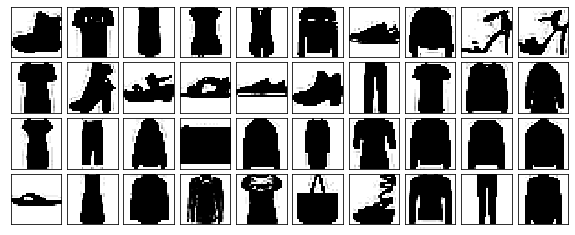

In [11]:
def plot_prenda(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw = {'xticks':[], 'yticks':[]},
                             gridspec_kw = dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_prenda(X_train)

####PCA para reducir a 2 dimensiones

In [ ]:
#Calculo eigen values y eigen vectors de la matriz de covarianza

cov_mat = np.cov(X_train_pca.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

In [ ]:
#descartar eigen values y eigen vectors de valores bajos
# (autovector, autovalor) 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Ordenar parejas en orden descendiente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])

varianza preservada para dos componentes:  0.4679453789952823


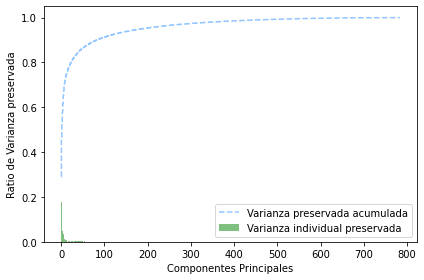

In [75]:
# calculo la varianza preservada
tot = sum(eig_vals)
var_exp = [(i / tot) for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("varianza preservada para dos componentes: ", str(cum_var_exp[1]))

# diagrama de barras para varianza preservada por cada eigen value, y la acumulada
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(784), var_exp, alpha=0.5, align='center', label='Varianza individual preservada', color='g')
    plt.step(range(784), cum_var_exp, where='mid', linestyle='--', label='Varianza preservada acumulada')
    plt.ylabel('Ratio de Varianza preservada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()

In [76]:
cum_var_exp[1]

0.4679453789952823

In [92]:
#Generamos la matríz a partir de los pares autovalor-autovector
matrix_w = np.hstack((eig_pairs[0][1].reshape(784,1),
                      eig_pairs[1][1].reshape(784,1)))

print('Matriz W:\n', matrix_w)

X_2D = X_train_pca.dot(matrix_w)

Matriz W:
 [[ 1.76521515e-07 -2.00777633e-07]
 [ 2.44768364e-06  3.25916172e-06]
 [ 1.67354171e-05  7.20161624e-06]
 ...
 [ 1.06623293e-03  2.38633309e-03]
 [ 1.14054578e-04  7.40179648e-04]
 [ 1.30759064e-05  6.89874688e-05]]


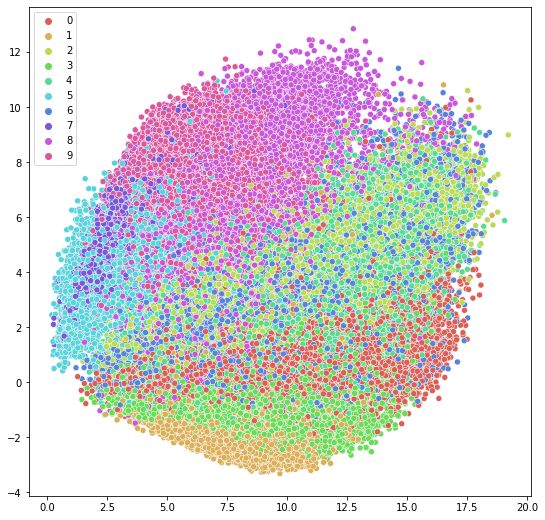

In [135]:
palette = sns.color_palette("hls", 10)
fig,ax=plt.subplots(1,1,figsize=(9,9))
sns.scatterplot(x = X_2D[:,0]
                , y = X_2D[:,1]
                , hue = y_train
                , palette = palette
                , legend = 'full')

####T-SNE con Sklearn para reducir a 2 dimensiones

In [94]:
X_train_tsne = X_train.reshape(60000,784)
X_train_tsne = X_train_tsne/255 

In [95]:
X_embedded = TSNE(n_components=2).fit_transform(X_train_tsne)
X_embedded.shape

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(60000, 2)

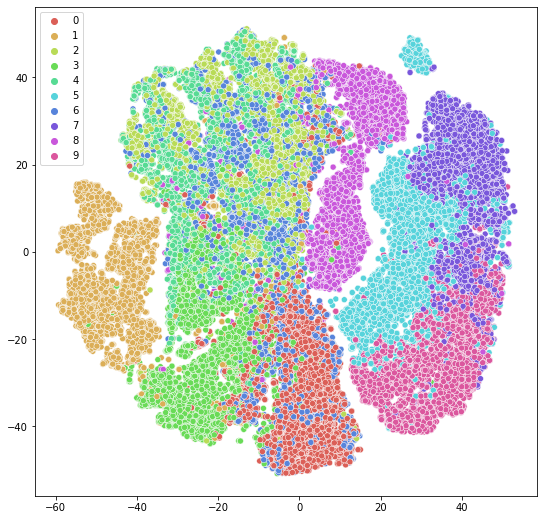

In [136]:
palette = sns.color_palette("hls", 10)
fig,ax=plt.subplots(1,1,figsize=(9,9))
sns.scatterplot(x = X_embedded[:,0]
                , y = X_embedded[:,1]
                , hue = y_train
                , palette = palette
                , legend = 'full')

####Clustering con representación reducida de PCA


In [99]:
from sklearn.cluster import KMeans

In [122]:
kmeansPCA = KMeans(n_clusters=10, random_state=0).fit(X_2D)
kmeansPCA.labels_

array([3, 4, 6, ..., 9, 6, 1], dtype=int32)

In [123]:
clustersPCA = kmeansPCA.predict(X_2D)
clustersPCA

array([3, 4, 6, ..., 9, 6, 1], dtype=int32)

In [124]:
centersPCA = kmeansPCA.cluster_centers_
centersPCA.shape

(10, 2)

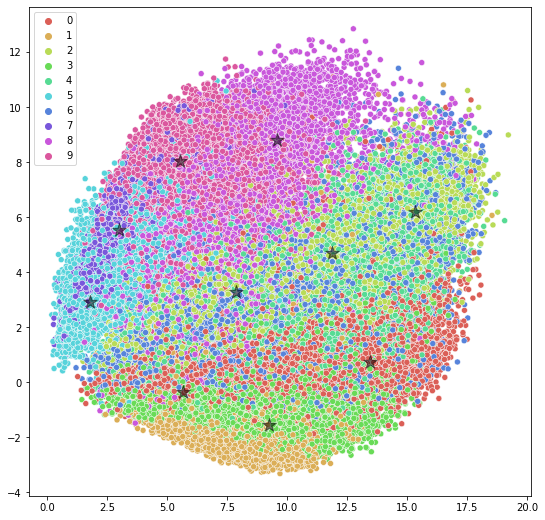

In [133]:
palette = sns.color_palette("hls", 10)
fig,ax=plt.subplots(1,1,figsize=(9,9))
sns.scatterplot(x = X_2D[:,0]
                , y = X_2D[:,1]
                , hue = y_train
                , palette = palette
                , legend = 'full')
plt.scatter(centersPCA[:, 0], centersPCA[:, 1], marker= '*',c='black', s=200, alpha=0.5)

####Clustering con representación reducida de T-SNE





In [100]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(X_embedded)
kmeans.labels_

array([1, 8, 3, ..., 3, 5, 5], dtype=int32)

In [111]:
clusters = kmeans.predict(X_embedded)
clusters

array([1, 8, 3, ..., 3, 5, 5], dtype=int32)

In [112]:
centers = kmeans.cluster_centers_
centers.shape

(10, 2)

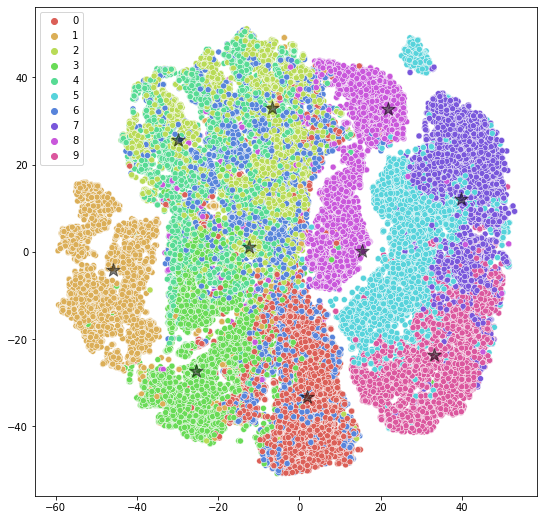

In [132]:
palette = sns.color_palette("hls", 10)
fig,ax=plt.subplots(1,1,figsize=(9,9))
sns.scatterplot(x = X_embedded[:,0]
                , y = X_embedded[:,1]
                , hue = y_train
                , palette = palette
                , legend = 'full')
plt.scatter(centers[:, 0], centers[:, 1], marker= '*',c='black', s=200, alpha=0.5)

Al realizar los experimentos de reducción de dimensionalidad se obtuvo que con PCA se preserva una varianza de 0.4679, T-SNE no preserva la varianza pero si preserva la distancia de acuerdo a los parametros utilizados.

En cuanto a velocidad de procesamiento, PCA es mas rapido que T-SNE.

En cuanto a la clasificación utilizando la reducción de dimensión se clasifica mejor con T-NSE, se ven mas definidas la separación de clases para T-NSE que para PCA.